In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')


In [3]:
#Display basic information about each dataset
print("Customers Dataset Info:")
print(customers.info())

Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [4]:
print("\nProducts Dataset Info:")
print(products.info())


Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [5]:
print("\nTransactions Dataset Info:")
print(transactions.info())


Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None


In [13]:
#Preview the datasets
print(customers.head())



  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [12]:
print(products.head())

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [11]:
print(transactions.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [15]:
# Check for missing values
print("Customers:\n", customers.isnull().sum())



Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [16]:
print("Products:\n", products.isnull().sum())

Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [17]:
print("Transactions:\n", transactions.isnull().sum())

Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [18]:
#Merge datasets for comprehensive analysis
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
print("\nMerged Data Head:\n", merged_data.head())



Merged Data Head:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLivi

In [19]:
#Check for discrepancies in price
price_discrepancies = merged_data[merged_data['Price_x'] != merged_data['Price_y']]
if not price_discrepancies.empty:
    print("\nPrice discrepancies found between Products.csv and Transactions.csv:")
    print(price_discrepancies[['ProductID', 'Price_x', 'Price_y']])


In [20]:
 #Statistical summary of the merged data
print("\nStatistical Summary:\n", merged_data.describe())


Statistical Summary:
           Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


In [21]:
#Convert dates to datetime for proper analysis
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])


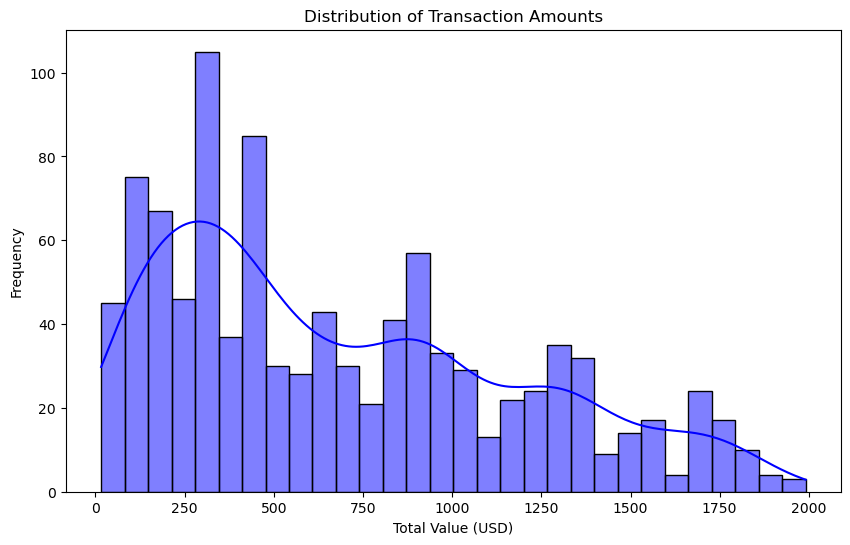

In [22]:
# Distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['TotalValue'], kde=True, bins=30, color='blue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Total Value (USD)')
plt.ylabel('Frequency')
plt.show()

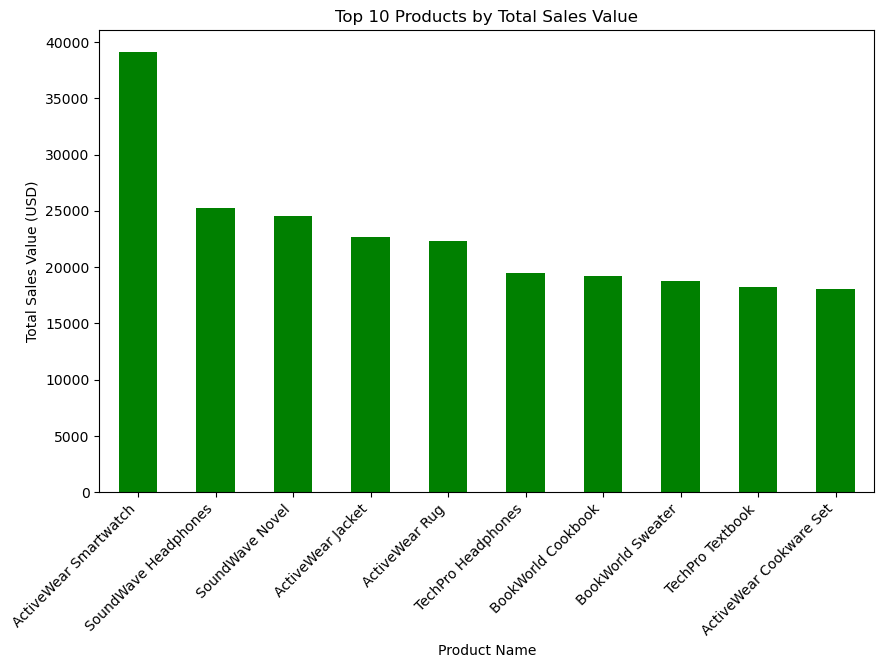

In [24]:
 #Top 10 products by total sales value
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='green')
plt.title('Top 10 Products by Total Sales Value')
plt.xlabel('Product Name')
plt.ylabel('Total Sales Value (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

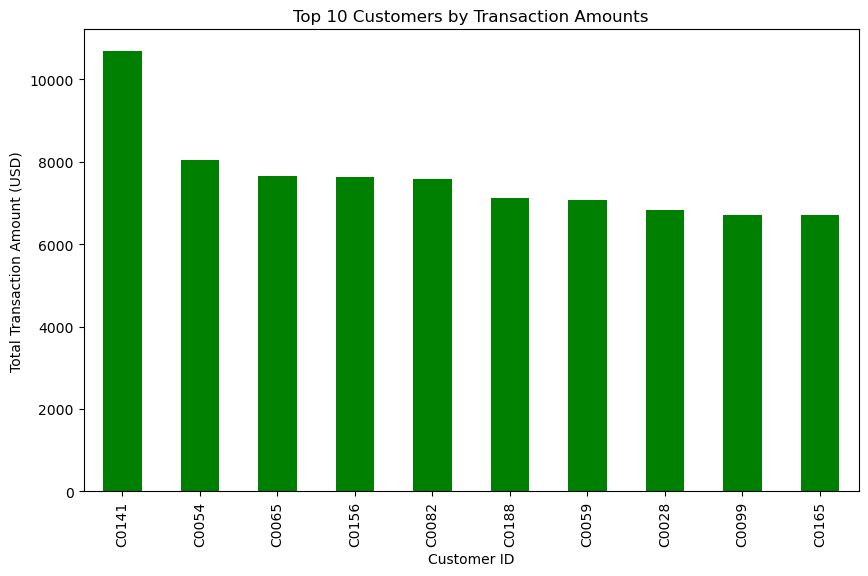

In [25]:
#Top 10 customers by transaction amounts
top_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='green')
plt.title('Top 10 Customers by Transaction Amounts')
plt.xlabel('Customer ID')
plt.ylabel('Total Transaction Amount (USD)')
plt.show()

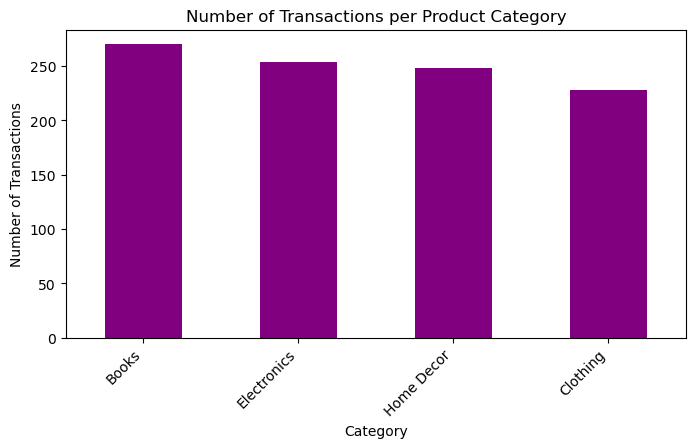

In [28]:
#Transactions per product category
category_counts = merged_data['Category'].value_counts()
plt.figure(figsize=(8, 4))
category_counts.plot(kind='bar', color='purple')
plt.title('Number of Transactions per Product Category')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.show()

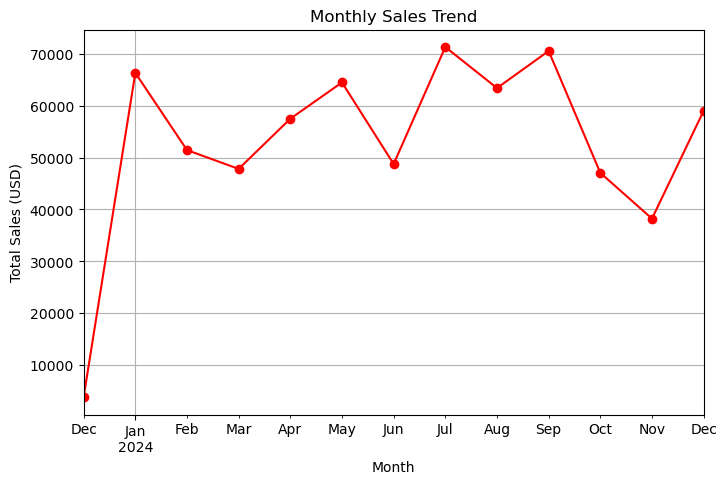

In [30]:
#Monthly sales trend
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby('Month')['TotalValue'].sum()
plt.figure(figsize=(8, 5))
monthly_sales.plot(kind='line', marker='o', color='red')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.grid()
plt.show()

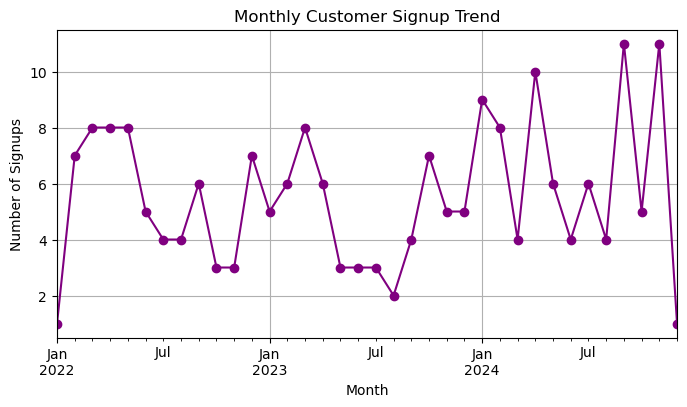

In [32]:
#Customer acquisition trend
customers['SignupMonth'] = customers['SignupDate'].dt.to_period('M')
signup_trend = customers.groupby('SignupMonth').size()
plt.figure(figsize=(8, 4))
signup_trend.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Customer Signup Trend')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.grid()
plt.show()